In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
df = pd.read_csv("data/ventas.csv")
df.columns = df.columns.str.strip()  # limpiar espacios
df["Fecha"] = pd.to_datetime(df["Fecha"])
df["VentaTotal"] = df["Cantidad"] * df["PrecioUnitario"]

# Mostrar las primeras filas
df.head()




,Fecha,Cliente,Producto,Cantidad,PrecioUnitario,VentaTotal
0,2025-01-01,A,X,10,20,200
1,2025-01-02,B,Y,5,15,75
2,2025-01-03,A,X,3,20,60
3,2025-01-04,C,Z,7,10,70
4,2025-01-05,B,X,2,20,40


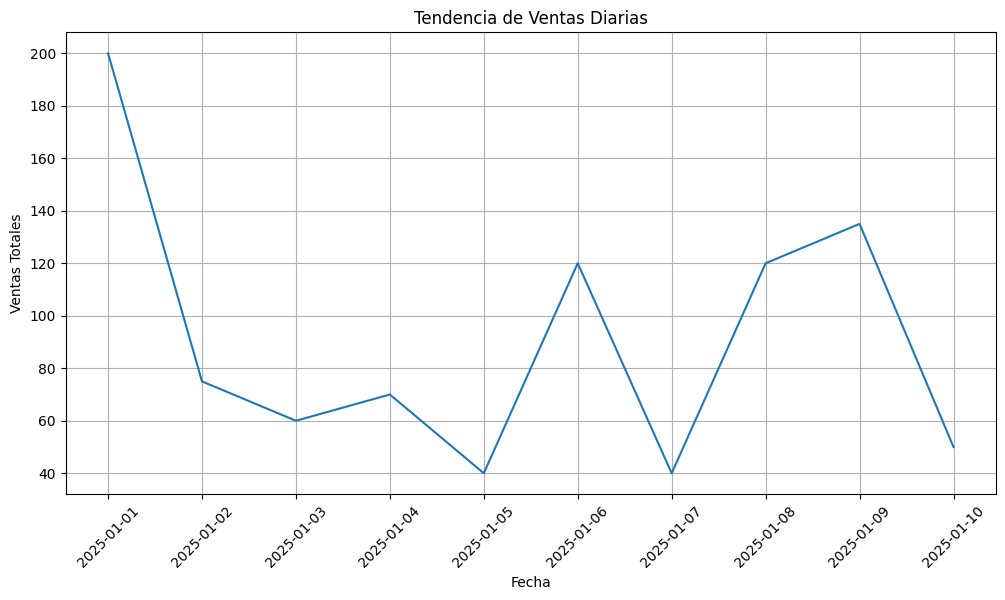

In [6]:
# Ventas totales por fecha
ventas_diarias = df.groupby("Fecha")["VentaTotal"].sum()

plt.figure(figsize=(12,6))
sns.lineplot(x=ventas_diarias.index, y=ventas_diarias.values)
plt.title("Tendencia de Ventas Diarias")
plt.xlabel("Fecha")
plt.ylabel("Ventas Totales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\WILI\AppData\Local\Temp\ipykernel_34560\335394112.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=producto_cantidad.index, y=producto_cantidad.values, palette="viridis")


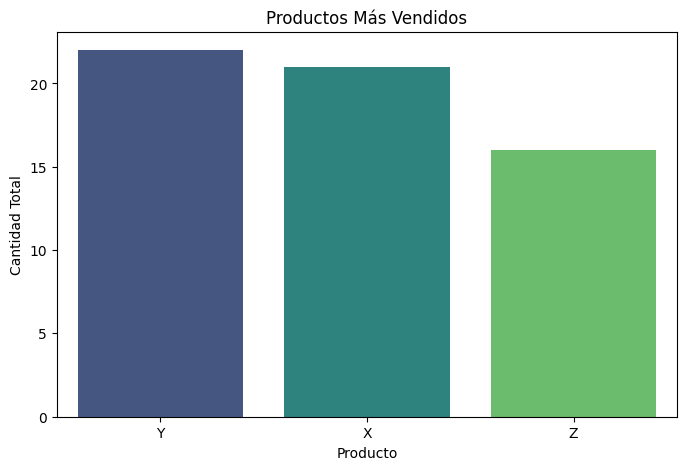

In [7]:
producto_cantidad = df.groupby("Producto")["Cantidad"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=producto_cantidad.index, y=producto_cantidad.values, palette="viridis")
plt.title("Productos Más Vendidos")
plt.ylabel("Cantidad Total")
plt.xlabel("Producto")
plt.show()


C:\Users\WILI\AppData\Local\Temp\ipykernel_34560\4003088198.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cliente_ventas.index, y=cliente_ventas.values, palette="magma")


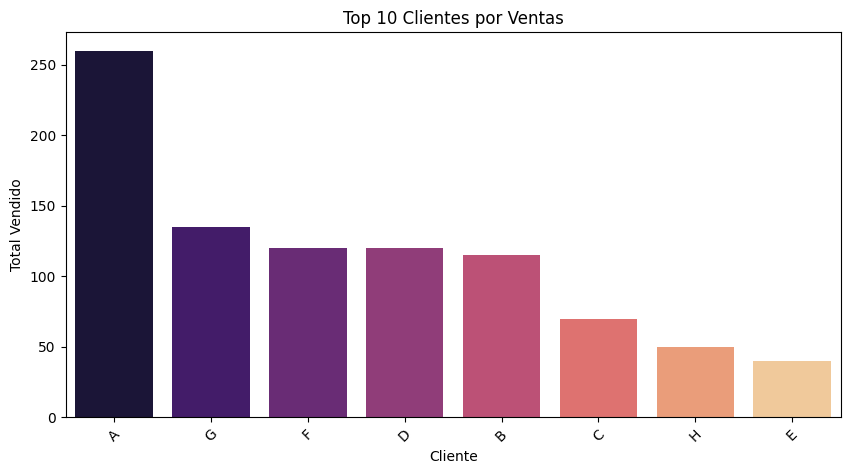

In [8]:
cliente_ventas = df.groupby("Cliente")["VentaTotal"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=cliente_ventas.index, y=cliente_ventas.values, palette="magma")
plt.title("Top 10 Clientes por Ventas")
plt.ylabel("Total Vendido")
plt.xlabel("Cliente")
plt.xticks(rotation=45)
plt.show()


In [9]:
ticket_producto = df.groupby("Producto")["VentaTotal"].mean()
print(ticket_producto)


Producto
X    105.000000
Y    110.000000
Z     53.333333
Name: VentaTotal, dtype: float64
